In [1]:
%matplotlib inline

import sys 
sys.path.append("../")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pgtaa.config import *
from pgtaa.core.utils_data import df_info

In [2]:
df = pd.read_csv(ENV_CSV, index_col=0, parse_dates=True)
train = pd.read_csv(TRAIN_CSV, index_col=0, parse_dates=True)
test = pd.read_csv(TEST_CSV, index_col=0, parse_dates=True)
df.shape, train.shape, test.shape

((3471, 32), (3123, 32), (348, 32))

In [3]:
assets = df.iloc[:,:8]
assets_train = train.iloc[:,:8]
assets_test = test.iloc[:,:8]

In [4]:
# linear returns
assets = assets.pct_change(1)
assets_train = assets_train.pct_change(1)
assets_test = assets_test.pct_change(1)

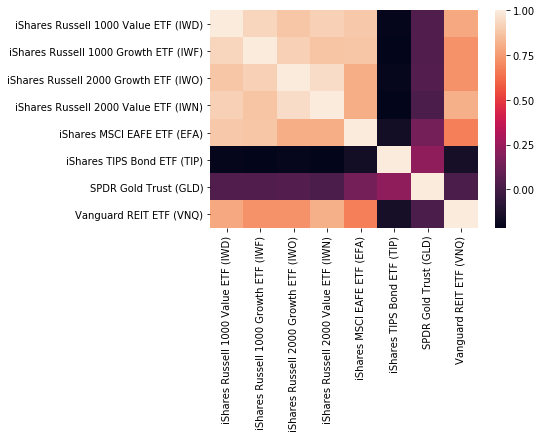

In [5]:
sns.heatmap(assets.corr())

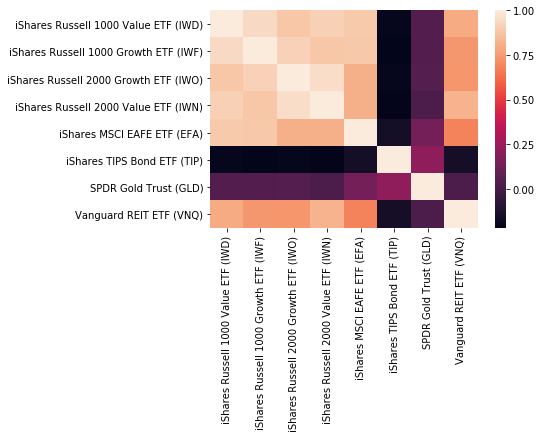

In [6]:
sns.heatmap(assets_train.corr())

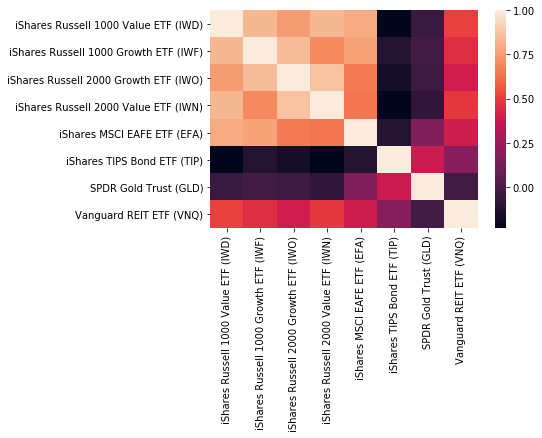

In [7]:
sns.heatmap(assets_test.corr())

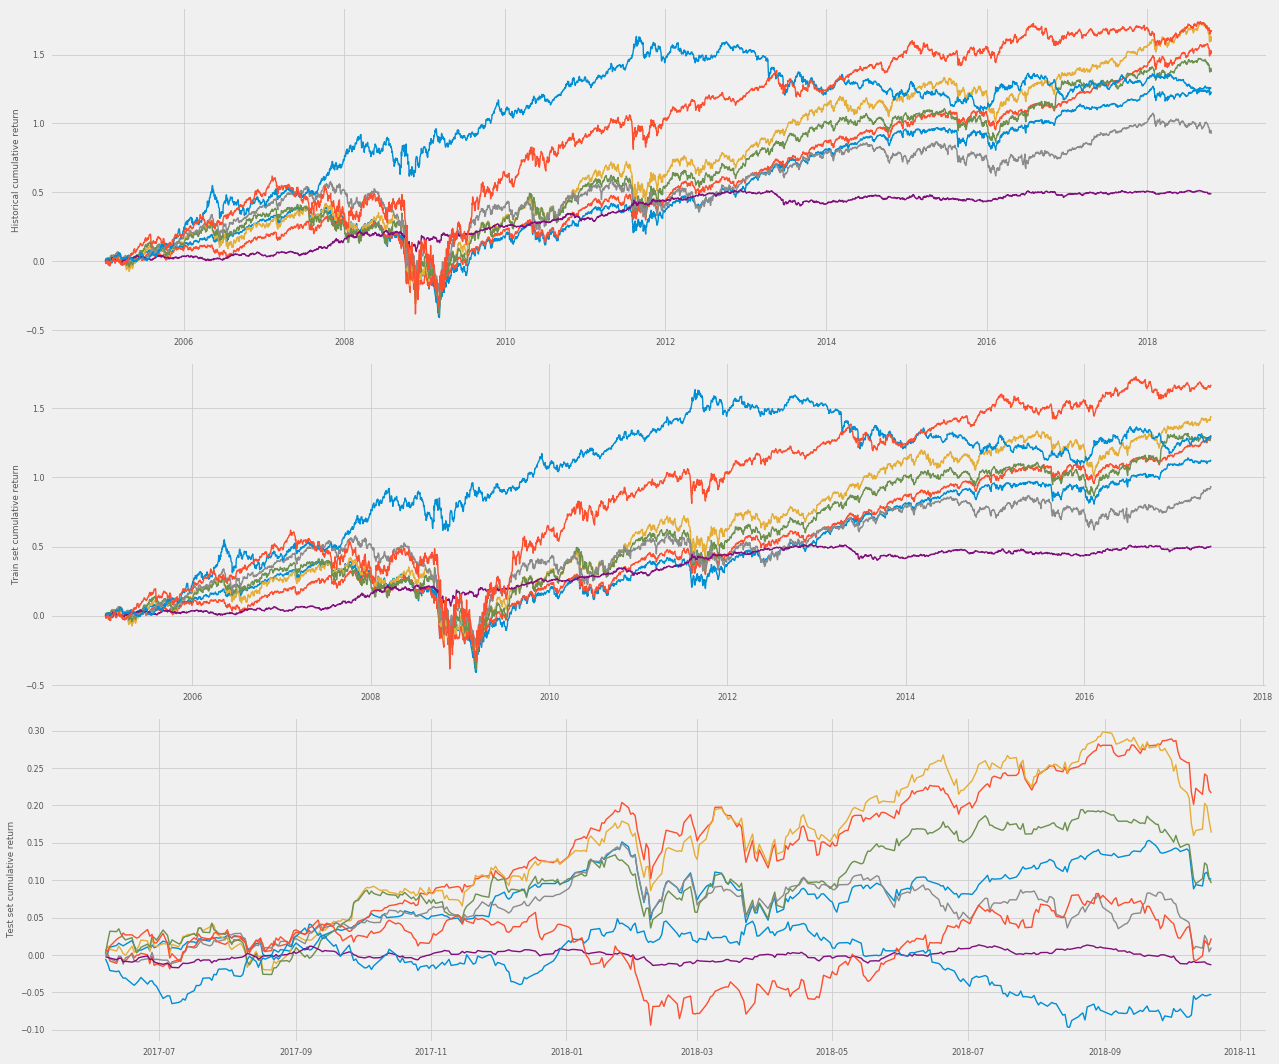

In [43]:
plt.style.use('seaborn-paper')
fig, axes = plt.subplots(3,1, sharex=False, figsize=(18,15))
axes[0].plot(assets.cumsum())
axes[0].set_ylabel('Historical cumulative return')
axes[1].plot(assets_train.cumsum())
axes[1].set_ylabel('Train set cumulative return')
axes[2].plot(assets_test.cumsum())
axes[2].set_ylabel('Test set cumulative return')
fig.tight_layout()
plt.show()

In [29]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']